## test simg


### JAH, June 2021

In [3]:
%matplotlib inline
#%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [264]:
import numpy             as np
import scipy.ndimage     as ndimg

import matplotlib.pyplot as plt

import clouds.utils      as cu
import clouds.simg       as  simg
import clouds.test_simg  as tsimg
#import clouds.sclouds    as sclouds
#import clouds.dclouds    as dclouds
from   clouds.pclouds    import fig, efig, ax3d, scatter, voxels, quiver
#import clouds.testclouds as tclouds

import clouds.sources      as sources

#import clouds.test_sources as tsources
#import clouds.test_sclouds as tsclouds
#import clouds.test_dclouds as tdclouds

In [265]:
plt.rcParams['image.cmap'] = 'rainbow'

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Sat Jun 26 18:54:56 2021


In [266]:
tsimg.test_gradient()
tsimg.test_hessian()
tsimg.test_laplacian()
tsimg.test_det_hessian()
tsimg.test_curvature()
tsimg.test_curvatures()
tsimg.test_min_curvature()
tsimg.test_min_transverse_curvature()
tsimg.test_transverse_curvatures()

dir  0 0.9999999999999986 1
dir  1 -0.9999999999999986 -1
hess [ 0 0 ] =  1.0 , mean  1.0000000000000377
hess [ 0 1 ] =  0.0 , mean  0.0
hess [ 1 0 ] =  0.0 , mean  0.0
hess [ 1 1 ] =  -1.0 , mean  -1.0000000000000377
laplacian =  0.0 , mean  0.0
det hessian =  -1.0 , mean  -1.0000000000000757
 curvature i  [0. 1.]  curv0  -0.5 mean curv -0.5000000000000098
 curvature i  [1. 0.]  curv0  0.5 mean curv 0.5000000000000098
sum curvatures  -0.500000000000117 , lap  -0.5
 min curv  -1.0 , min curv  -1.0000000000000195
 i-coor  0  edir  0.0 0.0
 i-coor  1  edir  1.0 1.0
 min transv curv0  -1.0 , min curv  -1.0000000000000195
 mag 1.0


In [293]:
tsimg.test_edge_filter()
tsimg.test_ridge_lambda_filter()
tsimg.test_ridge_filter()
tsimg.test_node_filter()
tsimg.test_blob_filter()

mean  39.5 40
mean  39.5 40
ridge  3.950617283950617 4
ridge  3.950617283950617 4


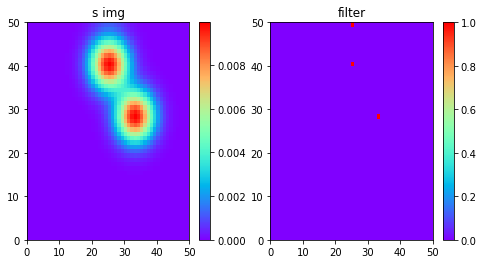

In [290]:
npoints = 2
img, points = sources.points(npoints = npoints)
ximg        = ndimg.gaussian_filter(img, sigma) if sigma > 0 else img 
    
mask        = ximg > 0
xfil        = simg.blob_filter(ximg, mask = mask)
    
fig(1, 2)
plt.subplot(1, 2, 1); voxels(ximg); plt.title('s img')
plt.subplot(1, 2, 2); voxels(xfil); plt.title('filter')

img = img.astype(bool)

sel 0 6561
(2, 2, 81, 81) (2, 81, 81) (2, 81, 81)
(81, 81)
1
6561
 curv < 0 6561
mask  6561
sel li < 0  6561
sel orthogonal  243
perc  6561


Text(0.5, 1.0, 'rv')

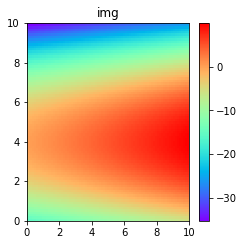

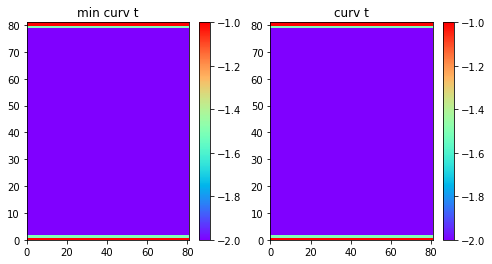

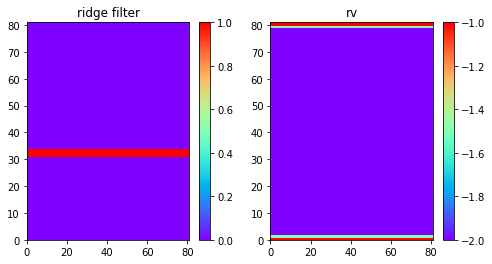

In [270]:
ndim   = len(ranges)
y0     = 4
fun    = lambda x : x[0] - (x[1] - y0)**2
ranges = ((0, 10), (0, 10))
nbins  = 81

img, bins = sources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
center    = tuple([[nborder, -nborder] for i in range(ndim)])

fig(2, 2)
plt.subplot(2, 2, 1); voxels(img, bins); plt.title('img');


ndim  = img.ndim
shape = img.shape
mask  = np.full(shape, True)

grad, gdir = simg.gradient(img, steps) 
curv0, edir = simg.min_transverse_curvature(img, steps)
sel0 = curv0 < 0
print('sel 0', np.sum(sel0))


hess  = simg.hessian(img, steps)
print(hess.shape, edir.shape, gdir.shape)

ndim = img.ndim
curv = np.zeros(img.shape)
for i in range(ndim):
    for j in range(ndim):
        curv += hess[i, j] * edir[i] * edir[j]
print(curv.shape)

xsel = mask
ls   = simg.transverse_curvatures(img, edir, steps)

fig(1, 2)
plt.subplot(1, 2, 1); voxels(curv0); plt.title('min curv t')
plt.subplot(1, 2, 2); voxels(ls[0]); plt.title('curv t')

print(len(ls))
for li in ls:
    xsel = (xsel) & (li < 0)
    print(np.sum(xsel))
#    xsel = (xsel) & (ls[i] < 0)
#    xsel = (xsel) & (np.abs(ls[-2]) > ls[-1])
#    cond = np.isclose(np.abs(np.sum(gdir * edir, axis = 0)), 1, atol = atol)
#    xsel = (xsel) & (cond)
        

xfil, rv = simg.ridge_filter(img, steps)
    

fig(1, 2)
plt.subplot(1, 2, 1); voxels(xfil); plt.title('ridge filter')
plt.subplot(1, 2, 2); voxels(rv); plt.title('rv')

3.950617283950617 4


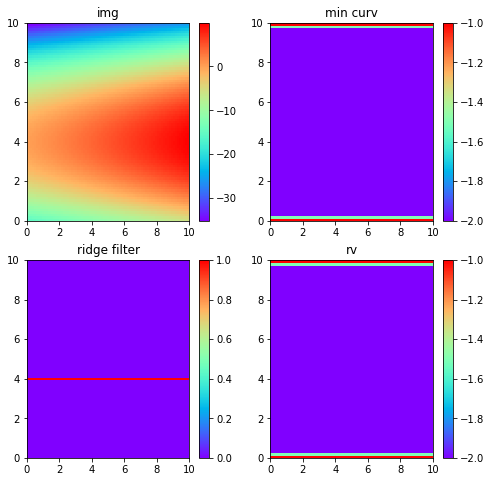

In [263]:
ndim   = len(ranges)
y0     = 4
fun    = lambda x : x[0] - (x[1] - y0)**2
ranges = ((0, 10), (0, 10))
nbins  = 81

img, bins = sources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
center    = tuple([[nborder, -nborder] for i in range(ndim)])

fig(2, 2)
plt.subplot(2, 2, 1); voxels(img, bins); plt.title('img');

grad, gdir = simg.gradient(img, steps) 
curv, edir = simg.min_curvature(img, steps)
plt.subplot(2, 2, 2); voxels(curv, bins); plt.title('min curv');

xfil, rv   = simg.ridge_lambda_filter(img, steps)

plt.subplot(2, 2, 3); voxels(xfil, bins); plt.title('ridge filter');
plt.subplot(2, 2, 4); voxels(rv, bins)  ; plt.title('rv');

xi = [x[1] for x in np.argwhere(xfil == True)]
print(steps[1] * np.mean(xi), y0)
assert np.isclose(steps[1] * np.mean(xi), y0, atol = 5e-2), 'Not good ridge lambda'

#print(ls)

In [153]:
ndim   = len(ranges)
fun    = lambda x : x[0] - (x[1] - y0)**2
ranges = ((0, 10), (0, 10))
nbins  = 81

img, bins = sources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]

center = tuple([[nborder, -nborder] for i in range(ndim)])

xfil, rv  = simg.ridge_filter(img, steps)

ValueError: shapes (81,81,2,2) and (2,81,81) not aligned: 2 (dim 3) != 81 (dim 1)

(81, 81)
mean  39.5 40


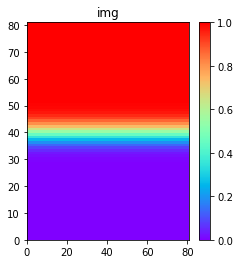

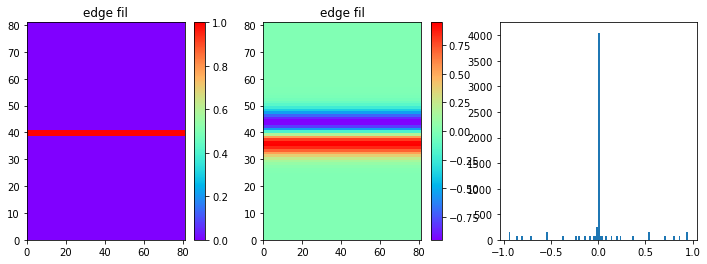

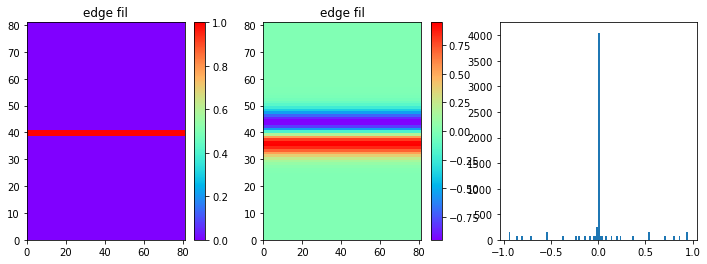

In [146]:
nborder = 5

sigma  = 4
nbins  = 81
a0, a1 = -10, 10
y0     = 4
ranges = ((a0-1, a1 + 1), (0, 10))

img  = np.zeros((nbins, nbins))
n0  = int(nbins/2)
img[:, n0:] = 1


print(img.shape)
img =  ndimg.gaussian_filter(img, sigma)

fig(1, 2); 
plt.subplot(1, 2, 1); voxels(img); plt.title('img');

center = tuple([[nborder, -nborder] for i in range(ndim)])

for math in ('False', 'True'):
    xfil, rv  = simg.edge_filter(img, steps, math_condition = math, perc = 100, atol = 5e-1)
    fig(1, 3)
    plt.subplot(1, 3, 1); voxels(xfil); plt.title('edge fil');
    plt.subplot(1, 3, 2); voxels(rv)  ;plt.title('edge fil');
    plt.subplot(1, 3, 3); plt.hist(rv.flatten(), 100);
    
xi = [x[1] for x in np.argwhere(xfil == True)]
print('mean ', np.mean(xi), n0)
assert np.isclose(np.mean(xi), n0, 1)

In [ ]:
sigma  = 4
y0     = 4
fun    = lambda x : x[0] - (x[1] - y0)**2
ranges = ((0, 10), (0, 10))
nbins  = 81

img, bins = csources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)
xmesh     = cu.ut_mesh(bins)

xfil, rv  = sclouds.ridge_filter(simg, steps)


# make a 2D histogram
fig(2, 2)
plt.subplot(2, 2, 1); voxels(simg, bins); plt.title('sigma img')
plt.subplot(2, 2, 2);
ax1 = ax3d(2, 2, 2)
ax1.plot_surface(*xmesh, simg);
plt.xlabel('x'); plt.ylabel('y'); plt.title('sigma img');
plt.subplot(2, 2, 3); voxels(xfil, bins); plt.title('ridge filter');
plt.subplot(2, 2, 4); voxels(rv, bins); plt.title('rv');
efig();